# Step 1 : PREPARING DATA

### READING DATA

DATA SET : https://archive.ics.uci.edu/ml/datasets/Skin+Segmentation

In [1]:
# Importing packages
import numpy as np
import pandas as pd
# import sklearn as sl
import matplotlib as mp

In [2]:
# Reading data
# df_samples = pd.read_csv('Skin_NonSkin.csv')
# df_samples
df_samples = pd.read_table('Skin_NonSkin.txt', delimiter='\t', dtype = np.int16) # I should check dtype parameter effect , dtype = np.int32
df_samples.head()

,74,85,123,1
0,73,84,122,1
1,72,83,121,1
2,70,81,119,1
3,70,81,119,1
4,69,80,118,1


In [4]:
# Renaming column labels
col_list = df_samples.columns.tolist()
# col_list
df_samples = df_samples.rename(columns = {col_list[0]:"B", col_list[1]:"G", col_list[2]:"R", col_list[3]:"CAT"})
df_samples.head()

,B,G,R,CAT
0,73,84,122,1
1,72,83,121,1
2,70,81,119,1
3,70,81,119,1
4,69,80,118,1


In [5]:
# As in data set description was mentioned there is no missing data 
#?????????????????????check if you need to check if all the values are positive integers
# df_samples.loc[~df_samples['B'].astype(str).str.isdigit(), 'CAT'].tolist()
# df_samples.all(  isinstance(x for x in df_samples, numbers.Integral) )
# all(x.is_integer() for x in df_samples.v)
# df_samples.loc[~(df_samples['B'] >= 0) && , 'CAT'].tolist()

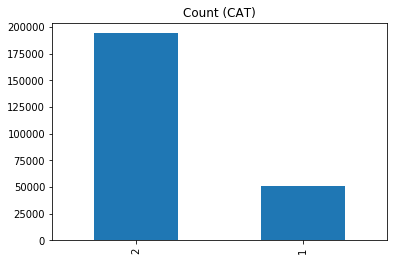

In [7]:
# Counting number of samples group by their categories
target_count = df_samples['CAT'].value_counts()
target_count.plot(kind='bar', title='Count (CAT)')
# As the plot shows data is imbalanced

In [8]:
# Removing duplicates
pd.DataFrame.drop_duplicates(df_samples, keep = 'first', inplace = True)
df_samples.head()

,B,G,R,CAT
0,73,84,122,1
1,72,83,121,1
2,70,81,119,1
4,69,80,118,1
7,76,87,125,1


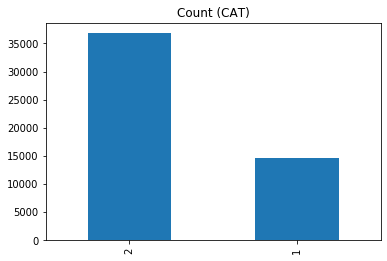

In [9]:
# After removing duplicates check if data is still imbalanced
target_count = df_samples['CAT'].value_counts()
target_count.plot(kind='bar', title='Count (CAT)')
# As the plot shows data is imbalanced

### PREPARING DATA

In [10]:
# Shuffling data
from sklearn import utils
df_samples = utils.shuffle(df_samples, random_state=84)
df_samples.head()

,B,G,R,CAT
9039,144,176,225,1
171930,61,168,71,2
57496,95,74,53,2
110570,206,206,212,2
122554,133,138,107,2


In [11]:
## Checkkk???
df_samples.dtypes

B      int16
G      int16
R      int16
CAT    int16
dtype: object

In [12]:
## ?? I don't know the reason yet
# np_samples = df_samples.to_numpy()
# np_samples

In [13]:
# Creating a data frame ???? 
# df_samples = pd.DataFrame(np_samples)
# df_samples.head()

In [14]:
# Oversampling minority class
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = 'minority', random_state=42)
y_train = df_samples['CAT']
X_train = df_samples.drop('CAT', axis='columns')
# y_train = np_samples[:, 3]
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

# plot to show that numbers of samples of categories are the same


# target_count2 = df_samples['CAT'].value_counts()
# type(target_count2)
# target_count2[0] = y_train_res[y_train_res == 1].shape
# target_count.plot(kind='bar', title='Count (target)')
# y_train_res.shape
# type (X_train_res)
# type(y_train)

In [15]:
X_train_res.shape

(73580, 3)

In [16]:
len(y_train_res[y_train_res == 2])

36790

In [17]:
len(y_train_res[y_train_res == 1])

36790

In [18]:
# from sklearn.model_selection import KFold
# from sklearn.ensemble import RandomForestClassifier
# X = np.array(X_train_res)
# y = np.array(y_train_res)
# kf = KFold(n_splits=5)
# kf.get_n_splits(X)
# for train_index, test_index in kf.split(X):
#     model = RandomForestClassifier(n_estimators=10)
#     model.fit(X[train_index], y[train_index])
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.2)

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.2)  

In [20]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# clf = RandomForestClassifier(random_state = 84)
# param_grid = {"n_estimators": np.arange(2, 6, 2),
#               "max_depth": np.arange(2, 4, 1),
#               "min_samples_split": np.arange(2,4,1),
#               "min_samples_leaf": np.arange(1,3,1),
# #               "max_leaf_nodes": np.arange(2,3,1),
#               "max_features": np.arange(1,3,1),
#               "bootstrap" :[True, False]
#              }

# param_grid = {"n_estimators": np.arange(10, 1000, 10),
#               "max_depth": np.arange(10, 200, 10),
#               "min_samples_split": np.arange(2, 50, 1),
#               "min_samples_leaf": np.arange(1, 50, 1),
#               "max_features": np.arange(1,3,1),
#               "bootstrap" : [True, False]
#              }

# def evaluate_param(parameter, num_range, index):
# grid_search = GridSearchCV(clf, param_grid = param_grid, cv = 5, verbose=2, n_jobs = -1)
# grid_search.fit(x_train, y_train)

# mp.pyplot.figure(figsize=(16,12))


# df_cv_results = pd.DataFrame(grid_search.cv_results_)


# df_cv_results.columns

# df_cv_results2 = pd.DataFrame(grid_search.cv_results_)[['param_max_depth', 'mean_test_score']]
# df_cv_results2 = df_cv_results2.sort_values(by = 'param_max_depth')
# mp.pyplot.subplot(3,2,2)
# plot2 = mp.pyplot.plot(df_cv_results2['param_max_depth'], df_cv_results2['mean_test_score']) 
# mp.pyplot.title('param_max_depth')

# df_cv_results2 = pd.DataFrame(grid_search.cv_results_)[['param_n_estimators', 'mean_test_score']]
# df_cv_results2 = df_cv_results2.sort_values(by = 'param_n_estimators')
# mp.pyplot.subplot(3,2,1)
# plot = mp.pyplot.plot(df_cv_results2['param_n_estimators'], df_cv_results2['mean_test_score'])
# mp.pyplot.title('param_n_estimators')
# 

# mp.pyplot.figure(figsize=(15, 15))
# index = 1

# for parameter, param_range in dict.items(param_grid):
#     cv_param = 'param_'+ parameter
#     df_cv_results = pd.DataFrame(grid_search.cv_results_)[[ cv_param, 'mean_test_score']]
#     df_cv_results = df_cv_results.sort_values(by = cv_param)
#     mp.pyplot.subplot(3,2,index)
#     mp.pyplot.title(cv_param)
#     mp.pyplot.plot(df_cv_results[cv_param], df_cv_results['mean_test_score']) 
#     index += 1



# for parameter, param_range in dict.items(param_grid):
#     print(parameter, param_range)
# df
#     return 
    
#     df = {}
#     for i, score in enumerate(grid_search.grid_scores_):
#         df[score[0][parameter]] = score[1]
       
    
#     df = pd.DataFrame.from_dict(df, orient='index')
#     df.reset_index(level=0, inplace=True)
#     df = df.sort_values(by='index')
 
#     mp.pyplot.subplot(3,2,index)
#     plot = mp.pyplot.plot(df['index'], df[0])
#     mp.pyplot.title(parameter)
#     return plot, df



# index = 1
# mp.pyplot.figure(figsize=(16,12))
# for parameter, param_range in dict.items(param_grid):
#     parameter
#     evaluate_param(parameter, param_range, index)
#     index += 1


# # Number of trees in random forest
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV
# # n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestClassifier()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train_res, y_train_res)

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=90, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=90, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
rf_classifier.feature_importances_
# rf_random.best_params_

array([0.25069543, 0.26645014, 0.48285443])

In [32]:
# rf_random.cv_results_
x_train

array([[ 60,  54,  17],
       [ 57,  58,  26],
       [ 84, 165,  70],
       ...,
       [255, 253, 183],
       [232, 219, 211],
       [103, 132, 169]], dtype=int16)

In [29]:
# bestimator = rf_random.best_estimator_
# bestimator

In [30]:
# This dataset is of the dimension 245057 * 4 where first three columns are B,G,R (x1,x2, and x3 features) values and fourth column is of the class labels (decision variable y).
# bestimator.feature_importances_

40.3 ms ± 2.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


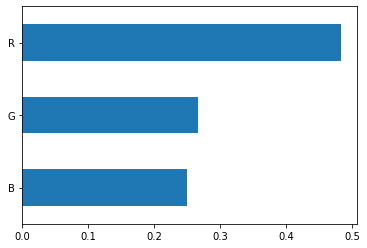

In [33]:
%%timeit
feature_importance = pd.Series(rf_classifier.feature_importances_, index = X_train.columns)
# feature_importance.sort()
feature_importance.plot(kind = "barh")

In [34]:
# bestimator.estimators_

In [35]:
# rf_random.best_score_ 

In [36]:
# rf_random.scorer_

In [37]:
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(n_estimators=10)
# model.fit(X_train_res, y_train_res)

In [41]:
rf_classifier.score(x_test, y_test)#????x_test, y_train, y_test

0.998980701277521

In [43]:
# rf_random

In [50]:
from sklearn.metrics import *
y_pred = rf_classifier.predict(x_test)
f1_score(y_test, y_pred)

0.9989851836817537

In [51]:
accuracy_score(y_test, y_pred)

0.998980701277521

In [52]:
recall_score(y_test, y_pred, average = None)

array([0.99972918, 0.99822671])

In [53]:
precision_score(y_test, y_pred, average = None)

array([0.99824229, 0.99972678])

In [54]:
confusion_matrix(y_test, y_pred)

array([[7383,    2],
       [  13, 7318]], dtype=int64)

In [50]:
# plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
#                       title='Normalized confusion matrix')